<a href="https://colab.research.google.com/github/JosephValencia725/Machine-Learning/blob/main/x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeros tweets recolectados:
               usuario                                              texto  \
0  1791496941559328768  3. XIX: giro anatomoclínico y estadístico.\n4....   
1  1377735877804326917  Goldman Sachs advierte que el gasto de capital...   
2   920961873910075392  El próximo 8 de octubre se celebrará el evento...   
3  1683066124689190913  @kallaico @PeculiarPi47155 @AVE_CyL @LaRegion ...   
4           3164545831  @SancadillaNorte Que raro para @Pellomaldonado...   

                      fecha  
0 2025-09-14 13:48:06+00:00  
1 2025-09-14 13:14:16+00:00  
2 2025-09-14 10:00:01+00:00  
3 2025-09-14 07:31:33+00:00  
4 2025-09-14 05:01:02+00:00  

✅ Tweets guardados en formato Parquet

Tweets con análisis de sentimiento:
               usuario                                              texto  \
0  1791496941559328768  3. XIX: giro anatomoclínico y estadístico.\n4....   
1  1377735877804326917  Goldman Sachs advierte que el gasto de capital...   
2   9209618739100753

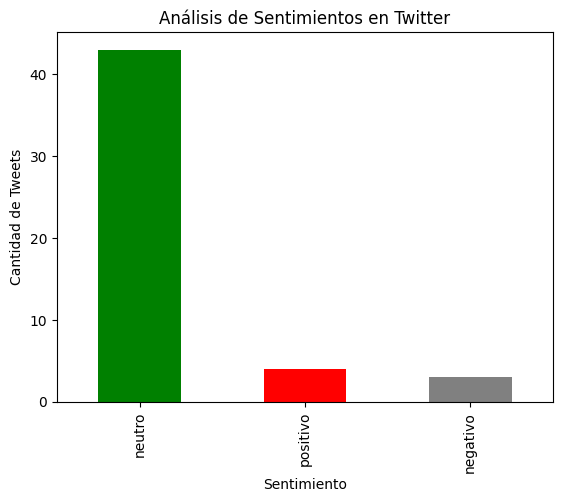

In [1]:
# =======================================
# 🚀 Análisis de Sentimientos en Twitter/X
# Taller - Almacenamiento y Procesamiento en Big Data
# =======================================

!pip install tweepy textblob pyarrow

import tweepy
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# ==============================
# 1. Autenticación con API v2
# ==============================
# 👉 Copia aquí tu BEARER TOKEN desde developer.x.com
bearer_token = "AAAAAAAAAAAAAAAAAAAAAHHJ4AEAAAAAgRwku5a0P0UrrsHq0fxB9W1QNDY%3D4kwnmFdMuIpdze1EyvVe1qaURD3G4Da4UAWKK3ENwxQUoPKy6F"

client = tweepy.Client(bearer_token=bearer_token)

# ==============================
# 2. Recolección de tweets
# ==============================
query = "Big Data lang:es -is:retweet"  # tweets en español, sin RT

tweets = client.search_recent_tweets(
    query=query,
    max_results=50,
    tweet_fields=["author_id", "created_at", "lang"]
)

data = []
for t in tweets.data:
    data.append({
        "usuario": t.author_id,
        "texto": t.text,
        "fecha": t.created_at
    })

df = pd.DataFrame(data)
print("Primeros tweets recolectados:")
print(df.head())

# ==============================
# 3. Guardar en formato Parquet
# ==============================
df.to_parquet("tweets.parquet", engine="pyarrow", index=False)
print("\n✅ Tweets guardados en formato Parquet")

# ==============================
# 4. Análisis de sentimientos
# ==============================
def analizar_sentimiento(texto):
    analisis = TextBlob(texto)
    if analisis.sentiment.polarity > 0:
        return "positivo"
    elif analisis.sentiment.polarity < 0:
        return "negativo"
    else:
        return "neutro"

df["sentimiento"] = df["texto"].apply(analizar_sentimiento)
print("\nTweets con análisis de sentimiento:")
print(df.head())

# ==============================
# 5. Visualización
# ==============================
conteo = df["sentimiento"].value_counts()
conteo.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Análisis de Sentimientos en Twitter")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Tweets")
plt.show()